# Logistic Regression, Decision Boundary

Goals:
Plot the decision boundary for a logistic regression model. This will give you a better sense of what the model is predicting.

# Dataset
Let's suppose you have following training dataset

The input variable X is a numpy array which has 6 training examples, each with two features
The output variable y is also a numpy array with 6 examples, and y is either 0 or 1

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_common import plot_data, sigmoid

ModuleNotFoundError: No module named 'lab_utils_common'

In [34]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 


# Plot data
Let's use a helper function to plot this data. The data points with label  𝑦=1
  are shown as red crosses, while the data points with label  𝑦=0
  are shown as blue circles.

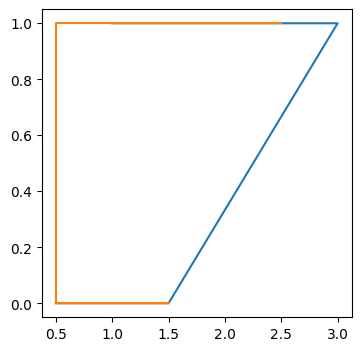

In [35]:
fig,ax = plt.subplots(1,1,figsize=(4,4))

plt.plot(X,y)

plt.show()

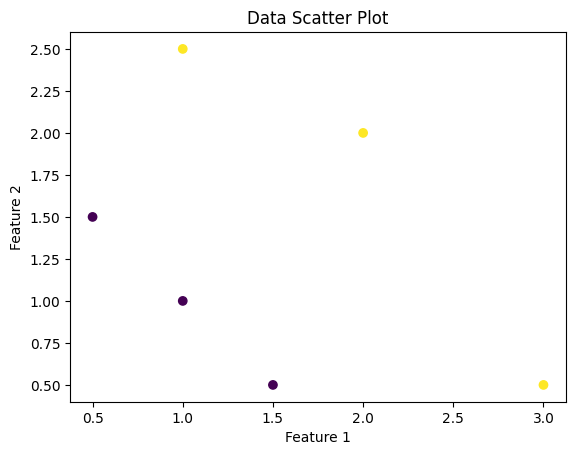

In [36]:
# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Scatter Plot')
plt.show()


# Logistic regression model
Suppose you'd like to train a logistic regression model on this data which has the form

𝑓(𝑥)=𝑔(𝑤0𝑥0+𝑤1𝑥1+𝑏)
 
where  𝑔(𝑧)=1 / 1+𝑒^−𝑧
 , which is the sigmoid function

Let's say that you trained the model and get the parameters as  𝑏=−3,𝑤0=1,𝑤1=1
 . That is,

𝑓(𝑥)=𝑔(𝑥0+𝑥1−3)
 
(You'll learn how to fit these parameters to the data further in the course)

Let's try to understand what this trained model is predicting by plotting its decision boundary

# Refresher on logistic regression and decision boundary
Recall that for logistic regression, the model is represented as

𝑓𝐰,𝑏(𝐱(𝑖))=𝑔(𝐰⋅𝐱(𝑖)+𝑏)               (1)
where 𝑔(𝑧)
 is known as the sigmoid function and it maps all input values to values between 0 and 1:

𝑔(𝑧)=1 / 1+𝑒^−𝑧                          (2)
and 𝐰⋅𝐱
 is the vector dot product:

𝐰⋅𝐱=𝑤0𝑥0+𝑤1𝑥1
We interpret the output of the model (𝑓𝐰,𝑏(𝑥)
) as the probability that 𝑦=1
 given 𝐱
 and parameterized by 𝐰
 and 𝑏
.

Therefore, to get a final prediction (𝑦=0
 or 𝑦=1
) from the logistic regression model, we can use the following heuristic -
if 𝑓𝐰,𝑏(𝑥)>=0.5
, predict 𝑦=1
if 𝑓𝐰,𝑏(𝑥)<0.5
, predict 𝑦=0
Let's plot the sigmoid function to see where 𝑔(𝑧)>=0.5

importing plot_data, sigmoid, draw_vthresh from lab_utils_common

In [37]:
# from lab_utils_common import plot_data, sigmoid, draw_vthresh
# Plot sigmoid(z) over a range of values from -10 to 10
# z = np.arange(-10,11)

# fig,ax = plt.subplots(1,1,figsize=(5,3))
# # Plot z vs sigmoid(z)
# ax.plot(z, sigmoid(z), c="b")

# ax.set_title("Sigmoid function")
# ax.set_ylabel('sigmoid(z)')
# ax.set_xlabel('z')
# draw_vthresh(ax,0)

using sigmoid manually as a function and using matplotlib to draw it

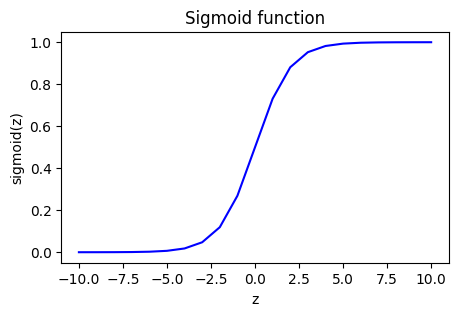

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.arange(-10, 11)

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(z, sigmoid(z), c="b")
ax.set_title("Sigmoid function")
ax.set_ylabel("sigmoid(z)")
ax.set_xlabel("z")
plt.show()

As you can see,  𝑔(𝑧)>=0.5
  for  𝑧>=0
 
For a logistic regression model,  𝑧=𝐰⋅𝐱+𝑏
 . Therefore,

if  𝐰⋅𝐱+𝑏>=0
 , the model predicts  𝑦=1
 
if  𝐰⋅𝐱+𝑏<0
 , the model predicts  𝑦=0
 
Plotting decision boundary
Now, let's go back to our example to understand how the logistic regression model is making predictions.

Our logistic regression model has the form

𝑓(𝐱)=𝑔(−3+𝑥0+𝑥1)
 
From what you've learnt above, you can see that this model predicts  𝑦=1
  if  −3+𝑥0+𝑥1>=0
 
Let's see what this looks like graphically. We'll start by plotting  −3+𝑥0+𝑥1=0
 , which is equivalent to  𝑥1=3−𝑥0
 

In the plot above, the blue line represents the line  𝑥0+𝑥1−3=0
  and it should intersect the x1 axis at 3 (if we set 𝑥1  = 3,  𝑥0  = 0) and the x0 axis at 3 (if we set  𝑥1  = 0,  𝑥0  = 3).
The shaded region represents  −3+𝑥0+𝑥1<0 . The region above the line is  −3+𝑥0+𝑥1>0
 .Any point in the shaded region (under the line) is classified as  𝑦=0
 . Any point on or above the line is classified as  𝑦=1. This line is known as the "decision boundary".
As we've seen in the lectures, by using higher order polynomial terms (eg:  𝑓(𝑥)=𝑔(𝑥20+𝑥1−1) , we can come up with more complex non-linear boundaries.

Question

True/False? No matter what features you use (including if you use polynomial features), the decision boundary learned by logistic regression will be a linear decision boundary. 

1. True 


2. False


False

While logistic regression is a linear classifier, meaning it learns a linear decision boundary, it is possible to transform the original features into higher dimensions using polynomial or other nonlinear transformations. In this case, the decision boundary learned by logistic regression can be a nonlinear decision boundary in the higher dimensional feature space. Therefore, the statement "the decision boundary learned by logistic regression will be a linear decision boundary" is false.
The decision boundary can also be non-linear, as described in the lectures. For example, the decision boundary could be a curve or even an oval, among other possible shapes.